In [3]:
import numpy as np
import pandas as pd
from numpy import random
import matplotlib.pyplot as plt
import seaborn as sns
import warnings
warnings.filterwarnings('ignore')
import nltk

In [7]:
s=pd.read_csv(r"C:\Users\hp\Desktop\Data_Analytics\spam.csv",encoding='cp1252')
s.shape

(6776, 5)

In [8]:
s.head()

,v1,v2,Unnamed: 2,Unnamed: 3,Unnamed: 4
0,ham,"Go until jurong point, crazy.. Available only ...",NaN,NaN,NaN
1,ham,Ok lar... Joking wif u oni...,NaN,NaN,NaN
2,spam,Free entry in 2 a wkly comp to win FA Cup fina...,NaN,NaN,NaN
3,ham,U dun say so early hor... U c already then say...,NaN,NaN,NaN
4,ham,"Nah I don't think he goes to usf, he lives aro...",NaN,NaN,NaN


In [12]:
#s.v2.value_counts()

In [14]:
msg=s.iloc[:,[0,1]]
msg

,v1,v2
0,ham,"Go until jurong point, crazy.. Available only ..."
1,ham,Ok lar... Joking wif u oni...
2,spam,Free entry in 2 a wkly comp to win FA Cup fina...
3,ham,U dun say so early hor... U c already then say...
4,ham,"Nah I don't think he goes to usf, he lives aro..."
...,...,...
6771,spam,This is the 2nd time we have tried 2 contact u...
6772,ham,Will Ì_ b going to esplanade fr home?
6773,ham,"Pity, * was in mood for that. So...any other s..."
6774,ham,The guy did some bitching but I acted like i'd...


In [15]:
msg.describe()

,v1,v2
count,6776,6776
unique,2,5165
top,ham,"Sorry, I'll call later"
freq,5854,38


In [16]:
msg.rename(columns={"v1":"label","v2":"message"},inplace=True)

In [17]:
msg

,label,message
0,ham,"Go until jurong point, crazy.. Available only ..."
1,ham,Ok lar... Joking wif u oni...
2,spam,Free entry in 2 a wkly comp to win FA Cup fina...
3,ham,U dun say so early hor... U c already then say...
4,ham,"Nah I don't think he goes to usf, he lives aro..."
...,...,...
6771,spam,This is the 2nd time we have tried 2 contact u...
6772,ham,Will Ì_ b going to esplanade fr home?
6773,ham,"Pity, * was in mood for that. So...any other s..."
6774,ham,The guy did some bitching but I acted like i'd...


In [18]:
msg.label.value_counts()

ham     5854
spam     922
Name: label, dtype: int64

In [19]:
le=msg.message.apply(len)
le

0       111
1        29
2       155
3        49
4        61
       ... 
6771    161
6772     37
6773     57
6774    125
6775     26
Name: message, Length: 6776, dtype: int64

In [20]:
msg=pd.concat([msg,le],axis=1)
msg

,label,message,message
0,ham,"Go until jurong point, crazy.. Available only ...",111
1,ham,Ok lar... Joking wif u oni...,29
2,spam,Free entry in 2 a wkly comp to win FA Cup fina...,155
3,ham,U dun say so early hor... U c already then say...,49
4,ham,"Nah I don't think he goes to usf, he lives aro...",61
...,...,...,...
6771,spam,This is the 2nd time we have tried 2 contact u...,161
6772,ham,Will Ì_ b going to esplanade fr home?,37
6773,ham,"Pity, * was in mood for that. So...any other s...",57
6774,ham,The guy did some bitching but I acted like i'd...,125


In [21]:
msg.columns.values[2]="length"

In [22]:
msg

,label,message,length
0,ham,"Go until jurong point, crazy.. Available only ...",111
1,ham,Ok lar... Joking wif u oni...,29
2,spam,Free entry in 2 a wkly comp to win FA Cup fina...,155
3,ham,U dun say so early hor... U c already then say...,49
4,ham,"Nah I don't think he goes to usf, he lives aro...",61
...,...,...,...
6771,spam,This is the 2nd time we have tried 2 contact u...,161
6772,ham,Will Ì_ b going to esplanade fr home?,37
6773,ham,"Pity, * was in mood for that. So...any other s...",57
6774,ham,The guy did some bitching but I acted like i'd...,125


In [25]:
from nltk.corpus import stopwords

In [26]:
nltk.download("stopwords")

[nltk_data] Downloading package stopwords to
[nltk_data]     C:\Users\hp\AppData\Roaming\nltk_data...
[nltk_data]   Unzipping corpora\stopwords.zip.


True

In [29]:
stopwords.words("english")

['i',
 'me',
 'my',
 'myself',
 'we',
 'our',
 'ours',
 'ourselves',
 'you',
 "you're",
 "you've",
 "you'll",
 "you'd",
 'your',
 'yours',
 'yourself',
 'yourselves',
 'he',
 'him',
 'his',
 'himself',
 'she',
 "she's",
 'her',
 'hers',
 'herself',
 'it',
 "it's",
 'its',
 'itself',
 'they',
 'them',
 'their',
 'theirs',
 'themselves',
 'what',
 'which',
 'who',
 'whom',
 'this',
 'that',
 "that'll",
 'these',
 'those',
 'am',
 'is',
 'are',
 'was',
 'were',
 'be',
 'been',
 'being',
 'have',
 'has',
 'had',
 'having',
 'do',
 'does',
 'did',
 'doing',
 'a',
 'an',
 'the',
 'and',
 'but',
 'if',
 'or',
 'because',
 'as',
 'until',
 'while',
 'of',
 'at',
 'by',
 'for',
 'with',
 'about',
 'against',
 'between',
 'into',
 'through',
 'during',
 'before',
 'after',
 'above',
 'below',
 'to',
 'from',
 'up',
 'down',
 'in',
 'out',
 'on',
 'off',
 'over',
 'under',
 'again',
 'further',
 'then',
 'once',
 'here',
 'there',
 'when',
 'where',
 'why',
 'how',
 'all',
 'any',
 'both',
 'each

In [30]:
import string
string.punctuation

'!"#$%&\'()*+,-./:;<=>?@[\\]^_`{|}~'

In [34]:
#example on string punctuation
abc="i want to? rmove !! all the ...punctuation marks $ from %% "
abc_refined=[i for i in abc if i not in string.punctuation]
abc_refined

['i',
 ' ',
 'w',
 'a',
 'n',
 't',
 ' ',
 't',
 'o',
 ' ',
 'r',
 'm',
 'o',
 'v',
 'e',
 ' ',
 ' ',
 'a',
 'l',
 'l',
 ' ',
 't',
 'h',
 'e',
 ' ',
 'p',
 'u',
 'n',
 'c',
 't',
 'u',
 'a',
 't',
 'i',
 'o',
 'n',
 ' ',
 'm',
 'a',
 'r',
 'k',
 's',
 ' ',
 ' ',
 'f',
 'r',
 'o',
 'm',
 ' ',
 ' ']

In [35]:
abc_refined="".join(abc_refined)
abc_refined

'i want to rmove  all the punctuation marks  from  '

In [36]:
aa=abc_refined.split()
aa

['i', 'want', 'to', 'rmove', 'all', 'the', 'punctuation', 'marks', 'from']

In [39]:
def text_process(mess):
    """
    1.remove the punctuation
    2.remove stopwords
    3.return the list of clean textwords
    """
    nopunc=[char for char in mess if char not in string.punctuation]
    nopunc="".join(nopunc)
    return[word for word in nopunc.split()if word not in stopwords.words("english")]


In [40]:
msg["message"].apply(text_process)

0       [Go, jurong, point, crazy, Available, bugis, n...
1                          [Ok, lar, Joking, wif, u, oni]
2       [Free, entry, 2, wkly, comp, win, FA, Cup, fin...
3           [U, dun, say, early, hor, U, c, already, say]
4       [Nah, I, dont, think, goes, usf, lives, around...
                              ...                        
6771    [This, 2nd, time, tried, 2, contact, u, U, å£7...
6772             [Will, Ì, b, going, esplanade, fr, home]
6773                     [Pity, mood, Soany, suggestions]
6774    [The, guy, bitching, I, acted, like, id, inter...
6775                              [Rofl, Its, true, name]
Name: message, Length: 6776, dtype: object

In [3]:
!pip install wordcloud
from wordcloud import WordCloud

In [48]:
cloud=WordCloud().generate(str(msg["message"]))
cloud

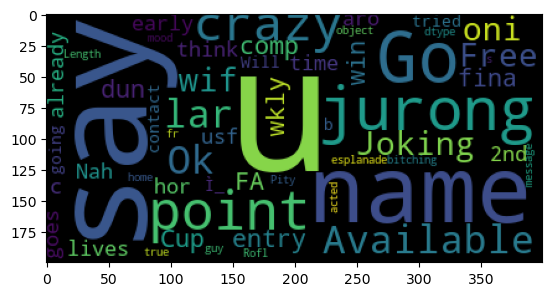

In [49]:
plt.imshow(cloud)

In [53]:
msg_ham=msg[msg.label=="ham"]
msg_ham

,label,message,length
0,ham,"Go until jurong point, crazy.. Available only ...",111
1,ham,Ok lar... Joking wif u oni...,29
3,ham,U dun say so early hor... U c already then say...,49
4,ham,"Nah I don't think he goes to usf, he lives aro...",61
6,ham,Even my brother is not like to speak with me. ...,77
...,...,...,...
6769,ham,Huh y lei...,12
6772,ham,Will Ì_ b going to esplanade fr home?,37
6773,ham,"Pity, * was in mood for that. So...any other s...",57
6774,ham,The guy did some bitching but I acted like i'd...,125


In [54]:
wc=WordCloud(max_words=50)

In [55]:
cloud_ham=wc.generate(str(msg_ham.message))
cloud_ham

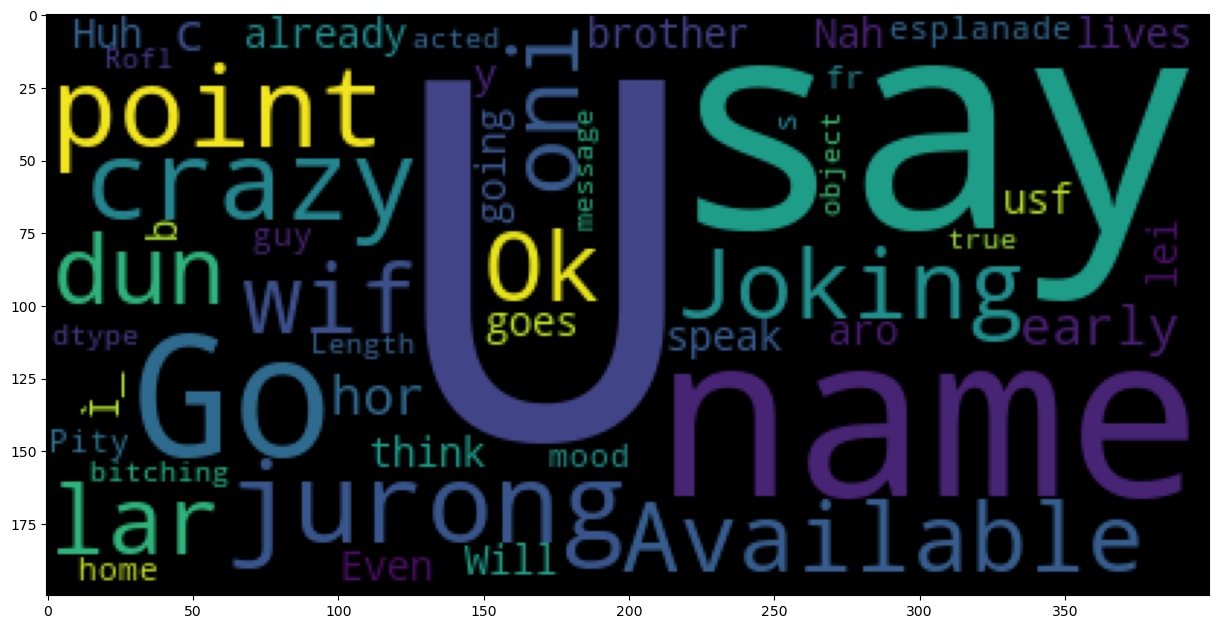

In [56]:
fig=plt.figure(figsize=(15,15))
plt.imshow(cloud_ham)

In [57]:
# cloud for spam

In [58]:
from sklearn.feature_extraction.text import CountVectorizer

In [59]:
bow_transformer=CountVectorizer(analyzer=text_process).fit(msg["message"])
bow_transformer.vocabulary_

{'Go': 2078,
 'jurong': 7633,
 'point': 8986,
 'crazy': 5863,
 'Available': 1117,
 'bugis': 5314,
 'n': 8408,
 'great': 7023,
 'world': 11219,
 'la': 7744,
 'e': 6309,
 'buffet': 5313,
 'Cine': 1497,
 'got': 6992,
 'amore': 4754,
 'wat': 11021,
 'Ok': 3122,
 'lar': 7777,
 'Joking': 2489,
 'wif': 11128,
 'u': 10758,
 'oni': 8659,
 'Free': 1959,
 'entry': 6422,
 '2': 421,
 'wkly': 11179,
 'comp': 5713,
 'win': 11140,
 'FA': 1855,
 'Cup': 1565,
 'final': 6648,
 'tkts': 10574,
 '21st': 441,
 'May': 2843,
 '2005': 428,
 'Text': 4015,
 '87121': 858,
 'receive': 9320,
 'questionstd': 9227,
 'txt': 10746,
 'rateTCs': 9268,
 'apply': 4832,
 '08452810075over18s': 72,
 'U': 4140,
 'dun': 6296,
 'say': 9621,
 'early': 6314,
 'hor': 7268,
 'c': 5357,
 'already': 4731,
 'Nah': 2993,
 'I': 2321,
 'dont': 6216,
 'think': 10496,
 'goes': 6963,
 'usf': 10857,
 'lives': 7917,
 'around': 4878,
 'though': 10513,
 'FreeMsg': 1961,
 'Hey': 2249,
 'darling': 5958,
 '3': 534,
 'weeks': 11067,
 'word': 11206,
 

In [60]:
len(bow_transformer.vocabulary_)

11480

In [61]:
message_bow=bow_transformer.transform(msg.message)

In [62]:
type(message_bow)

scipy.sparse._csr.csr_matrix

In [63]:
message_bow.shape

(6776, 11480)

In [68]:
from sklearn.feature_extraction.text import TfidfTransformer

In [69]:
Tfidf_Transformer=TfidfTransformer()

In [70]:
Tfidf_Transformer.fit(message_bow)

TfidfTransformer()

In [71]:
tfidf_mess=Tfidf_Transformer.transform(message_bow)
tfidf_mess

<6776x11480 sparse matrix of type '<class 'numpy.float64'>'
	with 67681 stored elements in Compressed Sparse Row format>

In [72]:
from sklearn.naive_bayes import MultinomialNB
nb=MultinomialNB()

In [74]:
spam_np=nb.fit(tfidf_mess,msg["label"])
spam_np

MultinomialNB()

In [75]:
p_spam=spam_np.predict(tfidf_mess)
p_spam

array(['ham', 'ham', 'spam', ..., 'ham', 'ham', 'ham'], dtype='<U4')

In [77]:
from sklearn.metrics import confusion_matrix
from  sklearn.metrics import classification_report

In [78]:
cf1=confusion_matrix(p_spam,msg["label"])
cf1

array([[5854,   95],
       [   0,  827]], dtype=int64)

In [79]:
ac=cf1.diagonal().sum()/cf1.sum()*100
ac

98.59799291617473

In [81]:
print(classification_report(p_spam,msg["label"]))

              precision    recall  f1-score   support

         ham       1.00      0.98      0.99      5949
        spam       0.90      1.00      0.95       827

    accuracy                           0.99      6776
   macro avg       0.95      0.99      0.97      6776
weighted avg       0.99      0.99      0.99      6776

